# Theoretical Background

To study the statistical properties of a many body system (such as fluids, gasses and plasma) a simulation of a stochastic model can be used to determine it's average behaviour (Creighton, 2012:101).

One of the simplest stochastic models is a 'random-walk', which could occur in any number of dimensions (Creighton, 2012:101).

**The one-dimensional random-walk**

For a one-dimensional random walk, a particle starting at position $x_{0}$ may step one unit of distance (either in the + or - direction, $\Delta x = \pm 1$), with one step occuring every unit of time. In this case it is assumed that it is equally likely for the particle to move in either direction. The position of the particle after $n$ steps is simply (Creighton, 2012:101): 

$$x_{n} = \Sigma_{i=1}^{n} \Delta x_{i}$$

And it's displacement after $n$ steps will be:

$$\Delta x_{n} = \Sigma_{i=1}^{n} |\Delta x_{i}|$$

The root-mean-squared displacement of the particle is therefore (Creighton, 2012:101):

$$\sqrt{<x_{n}^{2}>} = \sqrt{<(\Sigma_{i=1}^{n} \Delta x_{i})^{2}>} = \sqrt{\Sigma_{i=1, i \neq j}^{n} \Sigma_{j=1}^{n} <\Delta x_{i}. \Delta x_{j}>}$$

Since $\Delta x_{i}$ and $\Delta x_{j}$ are independent, it can be stated that $<\Delta x_{i}.\Delta x_{j}> = \delta_{ij}(\Delta x^{2})$. Therefore:

$$\sqrt{<x_{n}^{2}>} = \sqrt{\Sigma_{i=1, i \neq j}^{n} \Sigma_{j=1}^{n} <\Delta x_{i}. \Delta x_{j}>} = \sqrt{n}.\Delta x$$

Since the displacement has to be 1 unit of distance ($\Delta x = \pm 1$), the root-mean-square (RMS) displacement is: 

$$\sqrt{<x_{n}^{2}>} = \sqrt{n}$$

**Multi-dimensional random-walk**

A multi-dimensional random-walk follows the same principles, the RMS displacement for a multi-dimensional walk is simply: 

$$\sqrt{n}.\Delta r$$

Where:

$\Delta r$: The displacement.

For a 2-dimensional random-walk, where: $\Delta x = \pm 1$ and $\Delta y = \pm 1$:

$$\Delta r = \sqrt{(\Delta x)^2 + (\Delta y)^2} = \sqrt{2}$$

The RMS after n steps in this case is: $$\sqrt{<r_{n}^{2}>} = \sqrt{n}.\sqrt{2}$$

Where:

$\Delta r_{n}$: The displacement after n steps.

$\Delta r_{n} = \Sigma_{i=1}^{n} |\Delta r_{i}|$

For a 3-dimensional random-walk, where: $\Delta x = \pm 1$, $\Delta y = \pm 1$ and $\Delta z = \pm 1$:

$$\Delta r = \sqrt{(\Delta x)^2 + (\Delta y)^2 + (\Delta z)^2} = \sqrt{3}$$

The RMS after n steps in this case is: $$\sqrt{<r_{n}^{2}>} = \sqrt{n}.\sqrt{3}$$

Therefore, the RMS displacement for a d-dimension random-walk is theoretically expected to be equal to:

$$\sqrt{<r_{n}^{2}>} = \sqrt{n}.\sqrt{d}$$

# Import Libraries

Firstly, all the necessary libraries are imported.

In [1]:
# -------------
# Data handling
# -------------
import numpy as np # For handling data in arrays with locality of reference.
import pandas as pd

# ------------------
# Data visualization
# ------------------
import matplotlib.pyplot as plt # For data visualisation
import matplotlib.patches as patches
import seaborn as sns # For data visualisation styling
from mpl_toolkits import mplot3d # For 3D plots

# ----------------------
# Mathematical functions
# ----------------------
import random # To generate random numbers.
import math

# Define Functions

## RMS Displacement Plot

In [2]:
def RMS_plot(steps, RMS, dims):
    
    # ---------------------------------------------------------
    # Create and customize figure
    # ---------------------------------------------------------
    
    # Create figure
    plt.figure(figsize = [24,16])
    ax = plt.gca()
    
    # Set tick size
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # Set style
    sns.set_style('darkgrid')

    # Set title and axes
    plt.title('Experimental and Theoretical RMS Displacement of a {}D Random Walk'.format(dims), fontsize = 24)
    ax.set_xlabel('Step Number (n)', fontsize = 20)
    
    ax.set_ylabel(r'RMS Displacement $\sqrt{r_{n}^{2}}$', fontsize = 20)
    
    # ---------------------------------------------------------
    # Calculate Theeoretical RMS
    # ---------------------------------------------------------
    RMS_T = np.sqrt(dims) * (steps ** 0.5)

    # ---------------------------------------------------------
    # Plot RMS
    # ---------------------------------------------------------
    plt.scatter(steps, RMS, label = 'Average Experimental RMS Displacement', color = 'limegreen', edgecolor = 'black', marker = 'D', alpha = 0.9)
    
    if(dims == 1):
        plt.plot(steps, RMS_T, label = r'Theoretical RMS Displacement = $\sqrt{n}$', color = 'black')
    elif(dims == 2):
        plt.plot(steps, RMS_T, label = r'Theoretical RMS Displacement = $\sqrt{n}.\sqrt{2}$', color = 'black')
    elif(dims == 3):
        plt.plot(steps, RMS_T, label = r'Theoretical RMS Displacement = $\sqrt{n}.\sqrt{3}$', color = 'black')

    # Enable grid
    plt.grid(linewidth = 3, linestyle = '-')

    # Create legend
    plt.legend(loc = 'upper left', fontsize = 24)

## Random Walk Function

In [3]:
def random_walk(n_steps, n_walks, dims, seed):
    '''
    Calculates the path of a given number of random walks, with a given number of steps.
    
    Input:
    n_steps (int): Number of steps
    n_walks (int): Number of random walks
    dim (int): Number of dimensions. This value has to be either 1,2 or 3.
    seed (float): Random number seeds
    '''
    
    # For n time steps, there are n+1 points.
    n_points = n_steps + 1
    
    # ---------------------------------------------------------
    # Customize random walk figure
    # ---------------------------------------------------------
    
    # Create Figure
    fig = plt.figure(figsize = [24,16])
    
    # Set style
    sns.set_style('darkgrid')
    
    # Set tick sizes
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    
    # Enable grid
    plt.grid(linewidth = 3, linestyle = '-')
    
    # Set title and axes depending on the dimension of the random walk
    if (dims == 1):
        ax_1D = plt.gca()
        ax_1D.set_title('Path of {} 1D Random Walks, with {} Steps Each'.format(n_walks, n_steps), fontsize = 24)
        ax_1D.set_xlabel('Step Number (n)', fontsize = 20)
        ax_1D.set_ylabel('x-Coordinate', fontsize = 20)
    elif (dims == 2):
        ax_2D = plt.gca()
        plt.title('Path of {} 2D Random Walks, with {} Steps Each'.format(n_walks, n_steps), fontsize = 24)
        ax_2D.set_xlabel('x-Coordinate', fontsize = 20)
        ax_2D.set_ylabel('y-Coordinate', fontsize = 20)
    elif (dims == 3):
        ax_3D = plt.axes(projection="3d")
        plt.title('Path of {} 3D Random Walks, with {} Steps Each'.format(n_walks, n_steps), fontsize = 24)
        ax_3D.set_xlabel('x-Coordinate', fontsize = 20, labelpad = 25)
        ax_3D.set_ylabel('y-Coordinate', fontsize = 20, labelpad = 25)
        ax_3D.set_zlabel('z-Coordinate', fontsize = 20, labelpad = 25)
    
    
    # ----------------------------------------------------------
    # Calculate path and the experimental RMS of the random walks
    # ----------------------------------------------------------
    
    # Initiate RMS values for each walk
    RMS = [[0.00 for x in range(n_walks)] for y in range(n_points)]
    
    # Iterate through the number of random walks
    for i in range(n_walks):
        
        # Initialise Variables
        x = [0] * n_points # x coordinates
        y = [0] * n_points # y coordinates
        z = [0] * n_points # z coordinates
        r = [0] * n_points # Displacement
        r2 = [0] * n_points # Displacement Squared
        d2 = [0] * n_points # Sum of r2
        RMS = [[0.00] * n_points] * n_walks # RMS displacement for the walk
        steps = np.arange(start = 0, stop = n_points, step = 1) # Number of steps
        
        # Make steps
        for n in range(1, n_points):
            
            # Make a random step (either +1 or -1), depending on the dimension of the random walk
            if (dims >= 1 and dims <= 3):
                x[n] = x[n-1] + random.choice([-1, 1])
            if (dims >= 2 and dims <= 3):  
                y[n] = y[n-1] + random.choice([-1, 1])
            if (dims == 3):  
                z[n] = z[n-1] + random.choice([-1, 1])
        
            # Calculate displacement
            r[n] = np.sqrt((x[n]-x[n-1])**2 + (y[n]-y[n-1])**2 + (z[n]-z[n-1])**2)
            r2[n] = r[n]**2
            d2[n] = np.sum(r2)
            
            # Calculate RMS displacement
            RMS[i][n] = np.sqrt(d2[n])

        # ----------------------------------------------------------
        # Plot path of random walk
        # ----------------------------------------------------------
        
        if (dims == 3):
            ax_3D.scatter3D(x, y, z, label = 'Random Walk #{}'.format(i+1))
        elif (dims == 2):
            ax_2D.plot(x, y, label = 'Random Walk #{}'.format(i+1), alpha = 0.75)
            ax_2D.scatter(x, y, alpha = 0.75)
        elif (dims == 1):
            ax_1D.plot(steps, x, label = 'Random Walk #{}'.format(i+1), alpha = 0.75)
            ax_1D.scatter(steps, x, alpha = 0.75)
            
        # Create legend for random walks plot
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5, fontsize = 20)
    
    # ----------------------------------------------------------
    # Calculate average RMS from all walks and plot the RMS graph
    # ----------------------------------------------------------
    
    RMS_avg = [0.00] * n_points
    for n in range(n_points):
        total = 0
        for i in range(n_walks):
            total = total + RMS[i][n]
        RMS_avg[n] = total / n_walks
    
    # Plot the RMS in terms of the steps
    RMS_plot(steps, RMS_avg, dims)
    
    return None

## 1D Random Walk

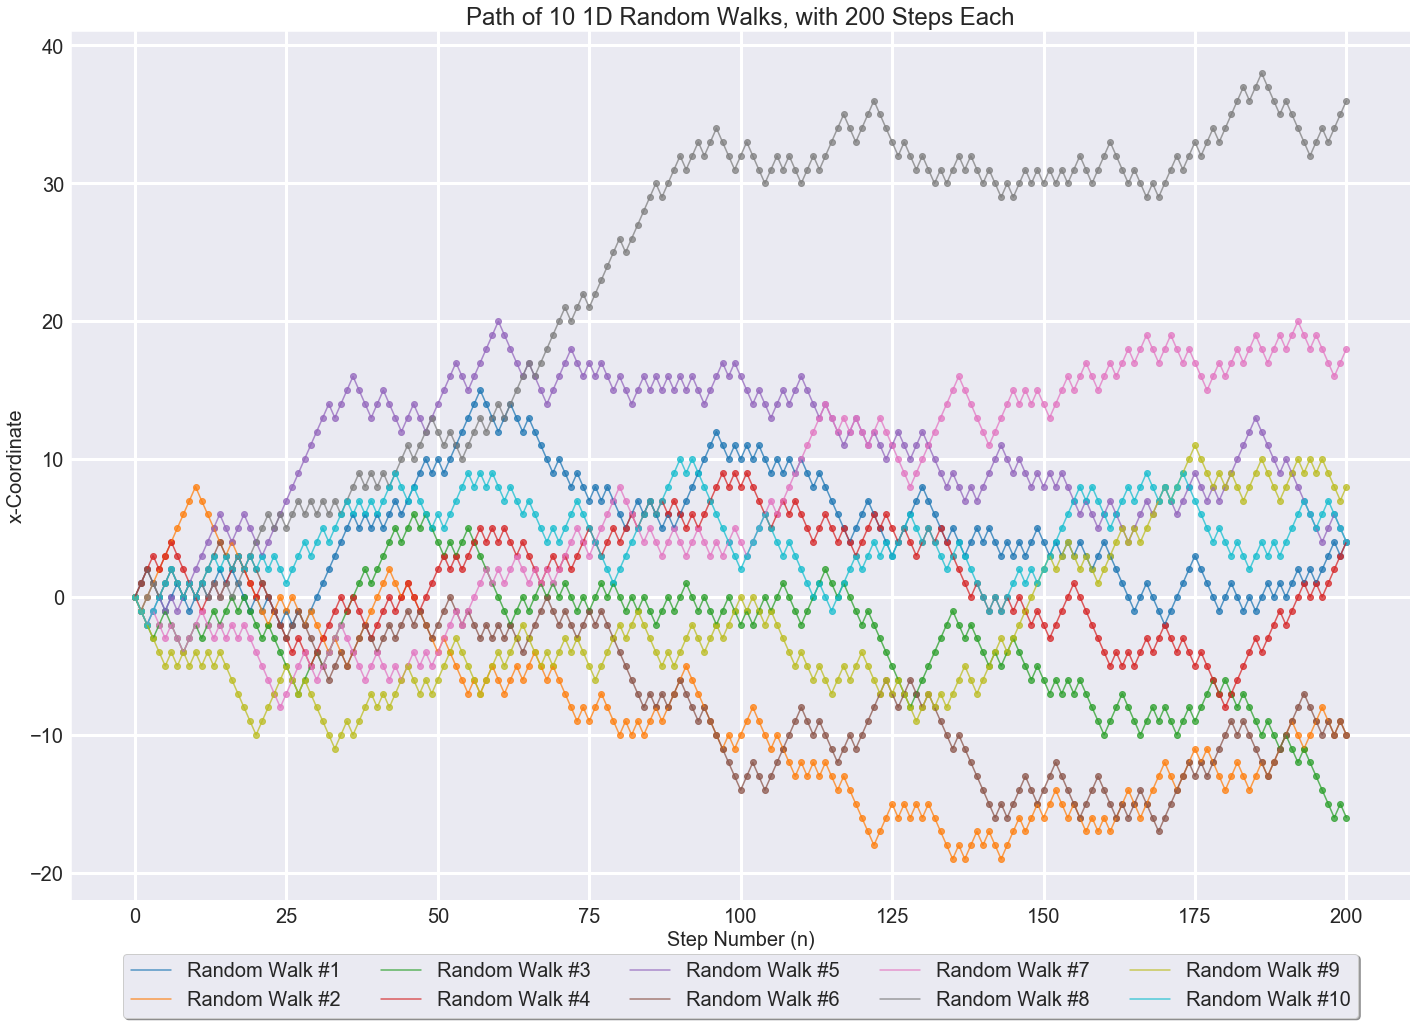

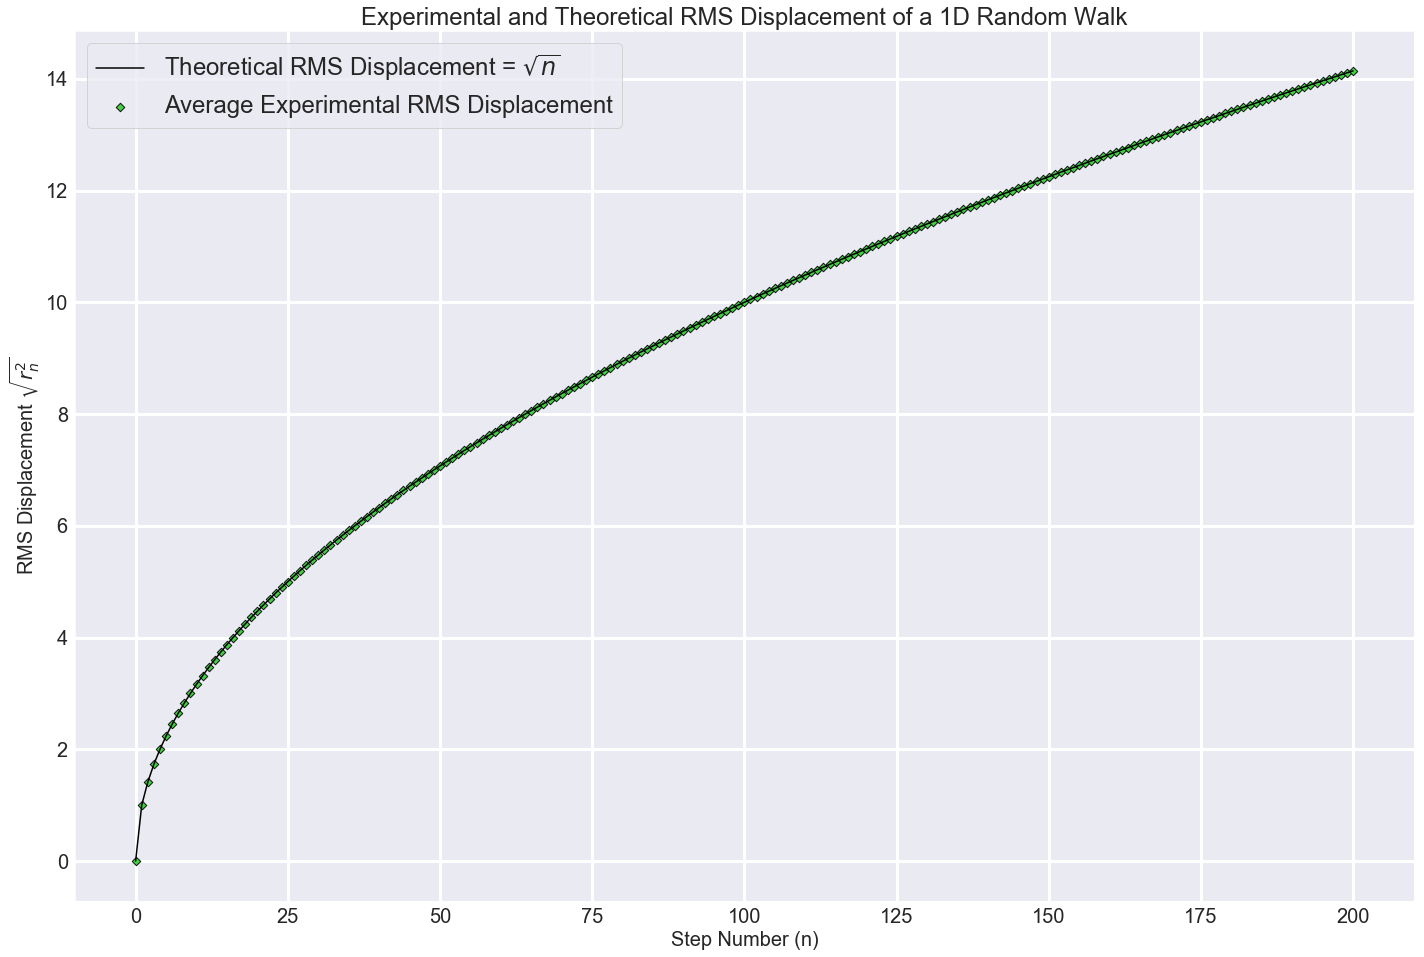

In [12]:
steps = 200
walks = 10
dims = 1
seed = 1

random_walk(steps, walks, dims, seed)

## 2D Random Walk

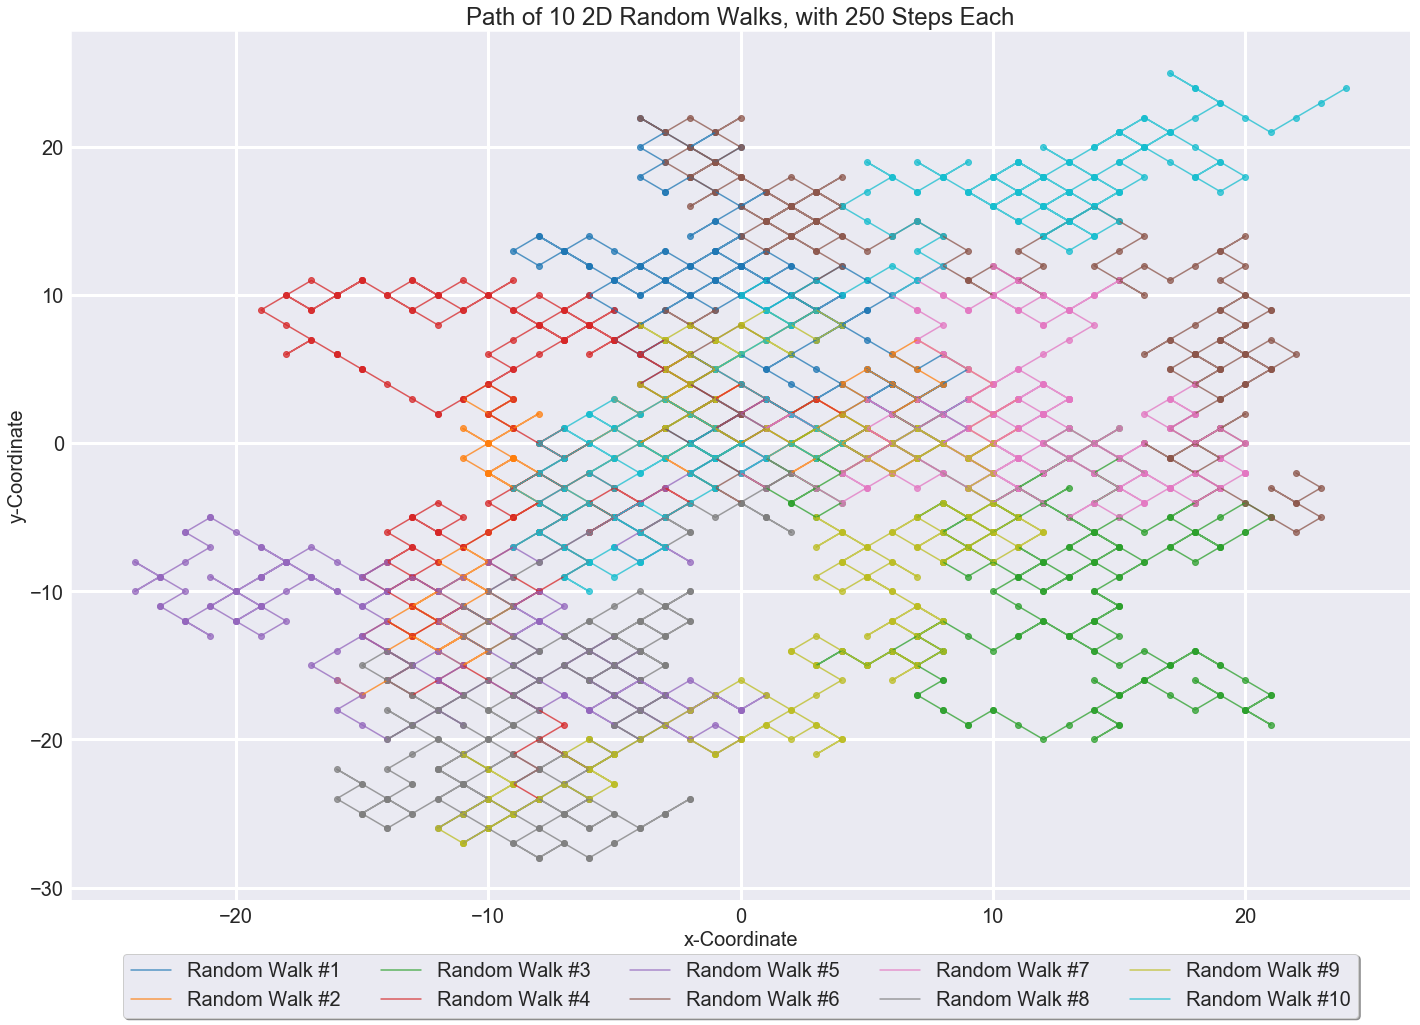

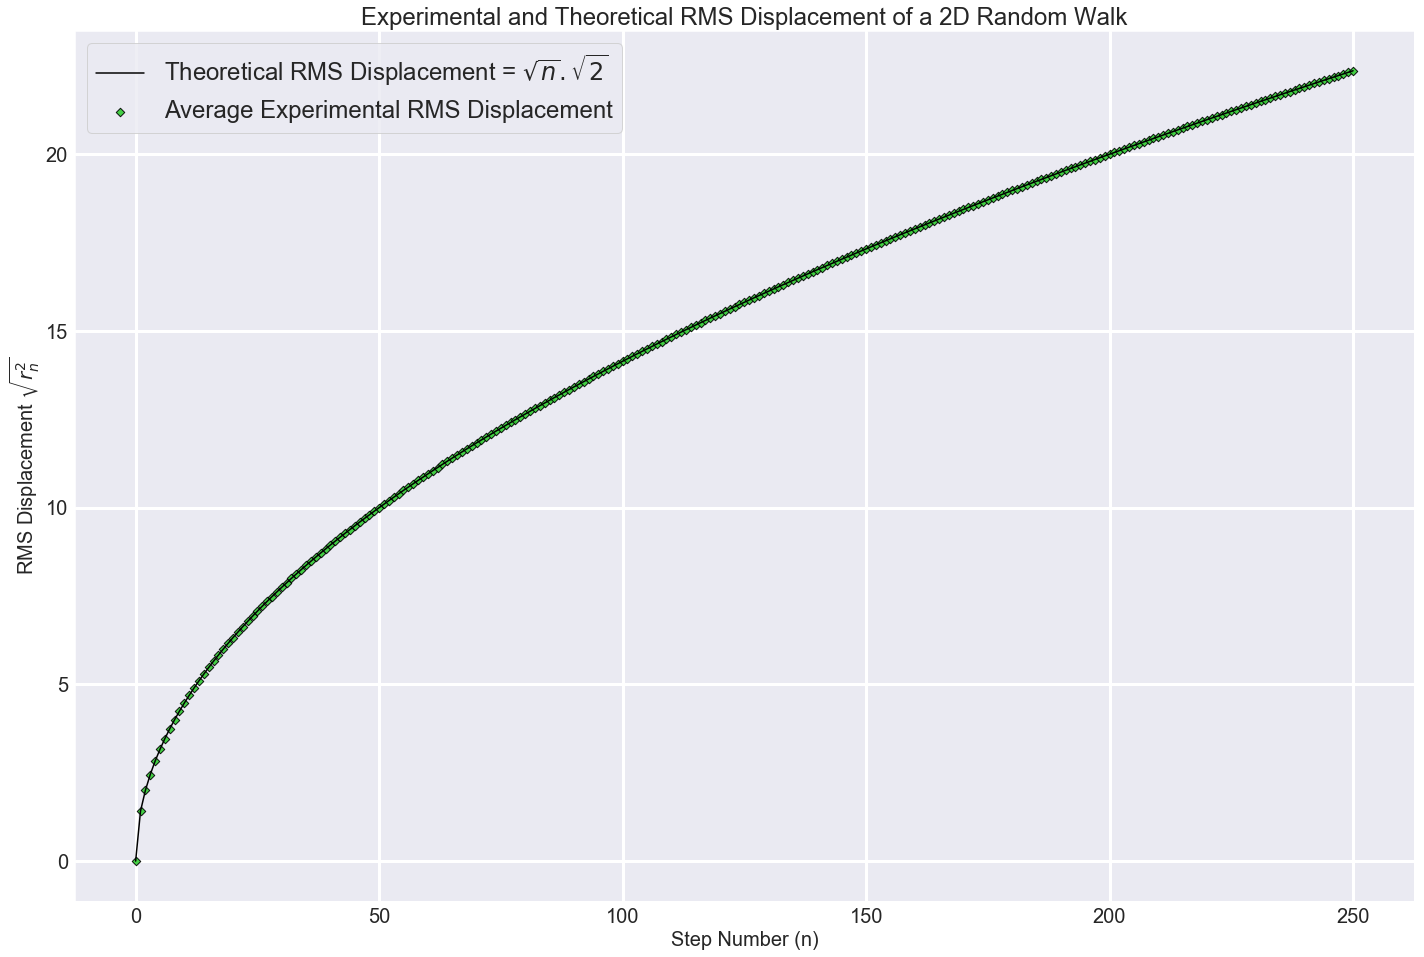

In [8]:
steps = 250
walks = 10
dims = 2
seed = 1
random_walk(steps, walks, dims, seed)

## 3D Random Walk

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


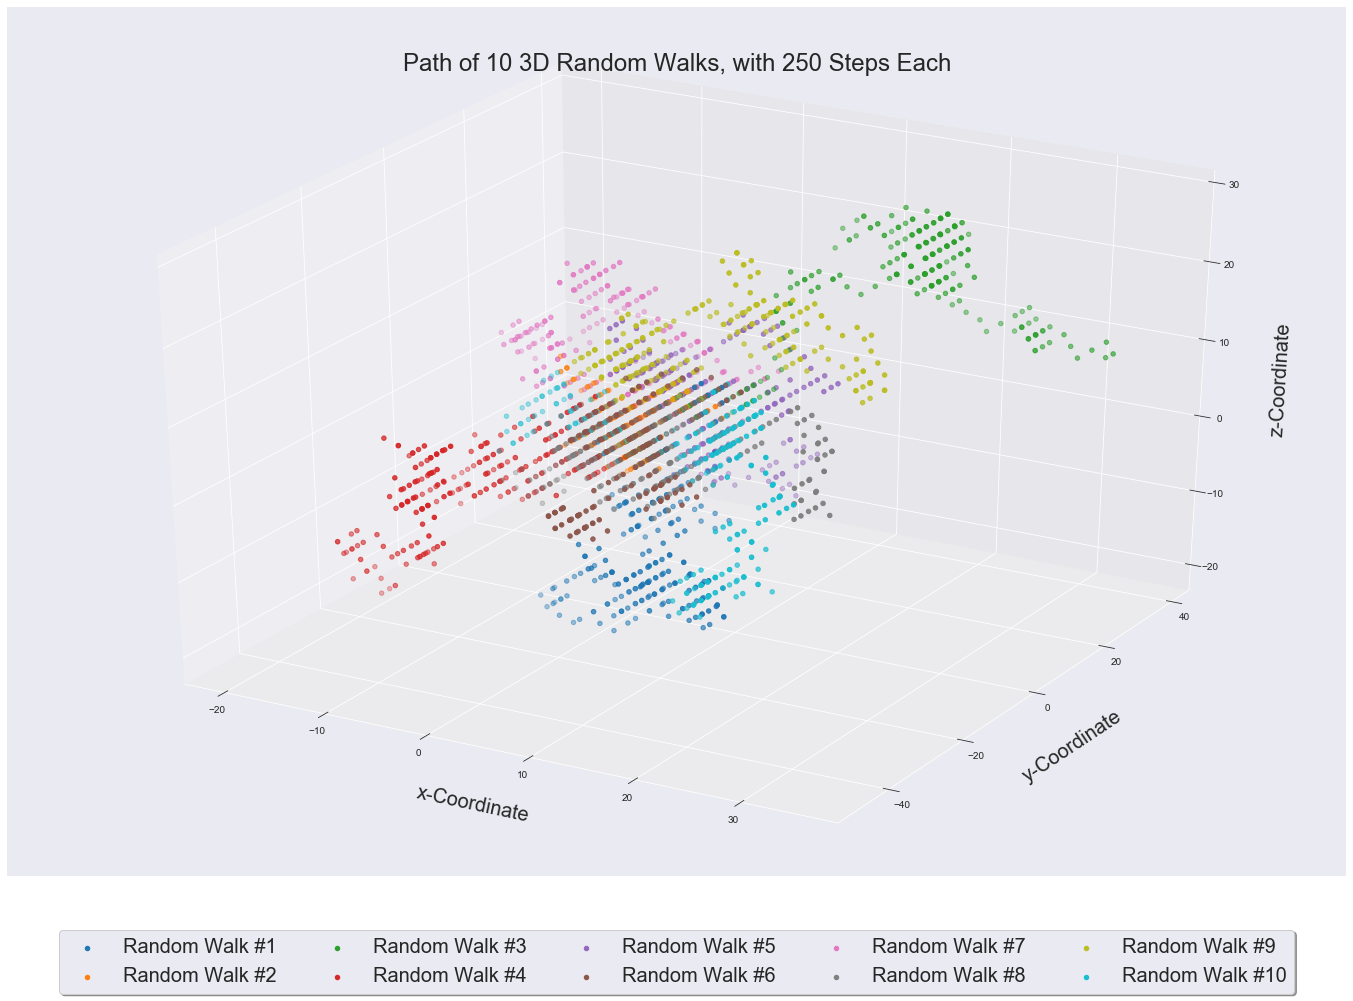

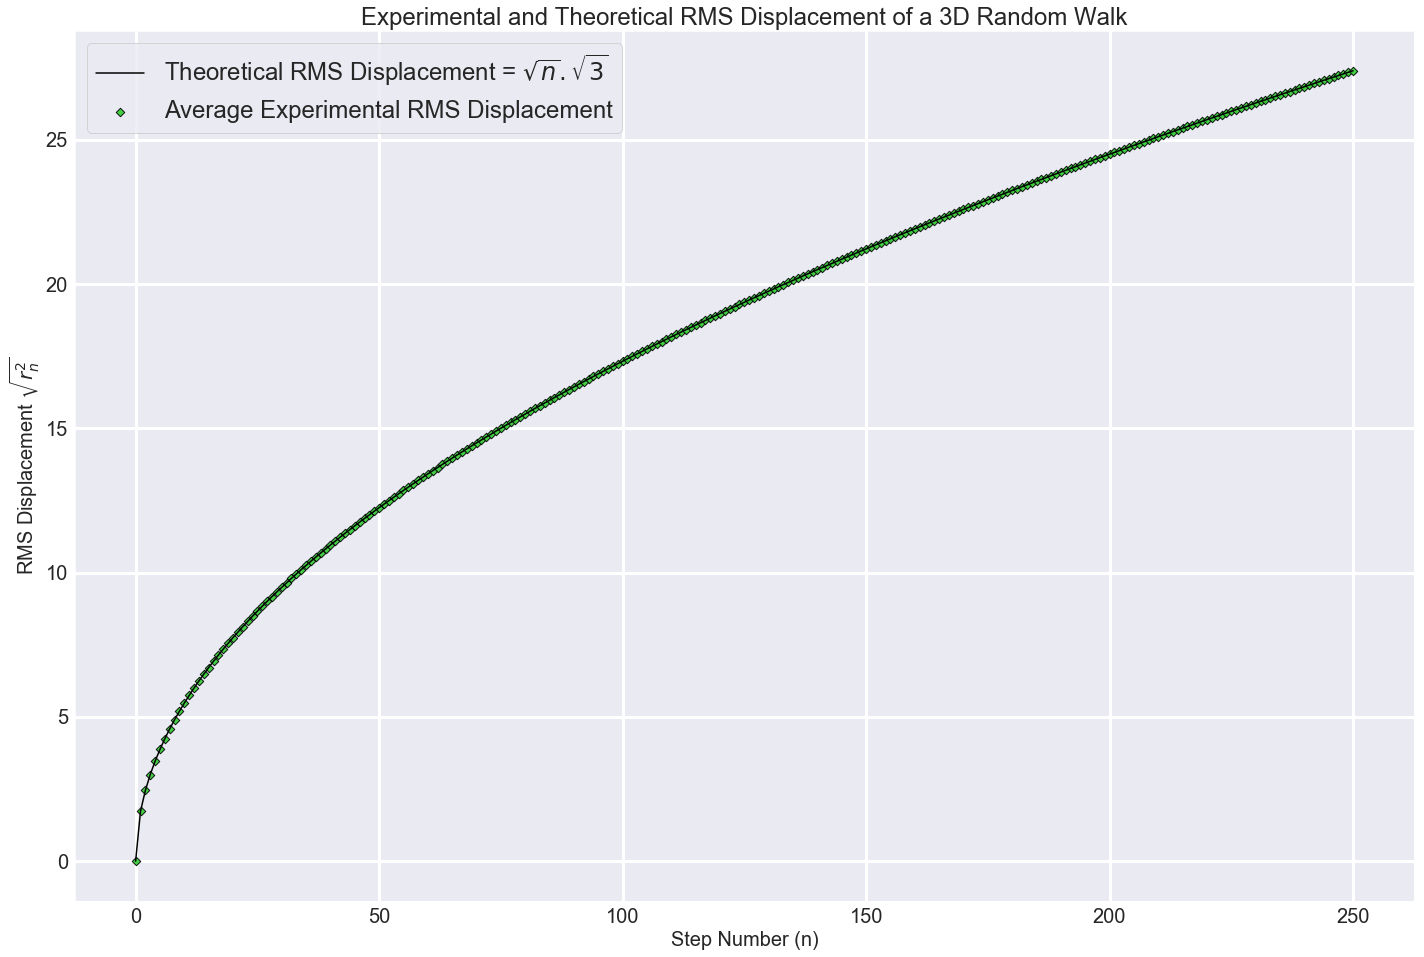

In [6]:
steps = 250
walks = 10
dims = 3
seed = 1
random_walk(steps, walks, dims, seed)

# Sources

- Creighton, J., 2012. Lecture Notes For Physics 801: Numerical Methods. [ebook] Jolien Creighton. Available at: <https://www.yumpu.com/en/document/view/38105763/lecture-notes-for-physics-801-numerical-methods-uwm-lsc> [Accessed 7 July 2020].